# **Project**
## Link to the dataset: https://www.kaggle.com/datasets/nowke9/ipldata ##

### Members: Arie Itzhacki, Vishwesh Srinivasan and Veer K. Kumar


DATA201

Fall 2022

Tufts University

In [1]:
# All the required libraries are loaded here
import warnings
warnings.filterwarnings("ignore")

import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import tree

### Data Cleaning ###

In [2]:
# Reading the dataset
iplmatches = pd.read_csv('matches.csv')
# Sorting by the season
iplmatches = iplmatches.sort_values('season')
# Subsetting the data to the required columns
iplmatches = iplmatches[['season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 
                         'winner', 'win_by_runs', 'win_by_wickets', 'venue']]
# Viewing the first five rows of the dataset
iplmatches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue
116,2008,Mumbai,6/1/2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,Dr DY Patil Sports Academy
82,2008,Jaipur,5/4/2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sawai Mansingh Stadium
81,2008,Mumbai,5/4/2008,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,Dr DY Patil Sports Academy
80,2008,Chandigarh,5/3/2008,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,"Punjab Cricket Association Stadium, Mohali"
79,2008,Hyderabad,5/25/2008,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,normal,0,Royal Challengers Bangalore,0,5,"Rajiv Gandhi International Stadium, Uppal"


In [3]:
# Checking the number of null values in each column
iplmatches.isnull().sum()

season            0
city              7
date              0
team1             0
team2             0
toss_winner       0
toss_decision     0
result            0
dl_applied        0
winner            4
win_by_runs       0
win_by_wickets    0
venue             0
dtype: int64

In [4]:
# Printing the rows which have null values in 'city' column
iplmatches[iplmatches['city'].isnull()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue
474,2014,NaN,4/28/2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Dubai International Cricket Stadium
476,2014,NaN,4/30/2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,Dubai International Cricket Stadium
469,2014,NaN,4/25/2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,Dubai International Cricket Stadium
468,2014,NaN,4/25/2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,Dubai International Cricket Stadium
466,2014,NaN,4/23/2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,Dubai International Cricket Stadium
462,2014,NaN,4/19/2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,Dubai International Cricket Stadium
461,2014,NaN,4/19/2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,Dubai International Cricket Stadium


In [5]:
# All the missing values in the 'city' column has the true value of Dubai. 
# The above information is obtained form the following source: 
# https://www.cricbuzz.com/cricket-series/2261/indian-premier-league-2014/matches
# Hence filling all the missing values by Dubai
iplmatches['city'].fillna('Dubai',inplace=True)

In [6]:
# Printing the rows which have null values in 'winner' column
iplmatches[iplmatches['winner'].isnull()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue
300,2011,Delhi,5/21/2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,Feroz Shah Kotla
545,2015,Bangalore,4/29/2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,M Chinnaswamy Stadium
570,2015,Bangalore,5/17/2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,M Chinnaswamy Stadium
744,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,M. Chinnaswamy Stadium


In [7]:
# The row '300' match was abandoned, so the row is dropped
# The row '545' match had no result, so the row is dropped
# The row '570' match had no result, so the row is dropped
# The row '744' match had no result, so the row is dropped
# Source for all the above information: https://www.cricbuzz.com
iplmatches = iplmatches.dropna(subset=['winner'])

In [8]:
# Checking the number of null values in each column to verify
iplmatches.isnull().sum()

season            0
city              0
date              0
team1             0
team2             0
toss_winner       0
toss_decision     0
result            0
dl_applied        0
winner            0
win_by_runs       0
win_by_wickets    0
venue             0
dtype: int64

In [9]:
# There are no null values now

In [10]:
# Dropping 'date' column since it is not required for the model
iplmatches = iplmatches.drop(['date'], axis=1)

In [11]:
# Viewing the first five rows of the dataset
iplmatches.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue
116,2008,Mumbai,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,Dr DY Patil Sports Academy
82,2008,Jaipur,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sawai Mansingh Stadium
81,2008,Mumbai,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,Dr DY Patil Sports Academy
80,2008,Chandigarh,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,"Punjab Cricket Association Stadium, Mohali"
79,2008,Hyderabad,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,normal,0,Royal Challengers Bangalore,0,5,"Rajiv Gandhi International Stadium, Uppal"


In [12]:
# Checking the unique values in 'season' column
iplmatches["season"].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019], dtype=int64)

In [13]:
# There are no issues with the 'season' column

In [14]:
# Checking the unique values and their corresponding frequency in 'city' column
iplmatches["city"].value_counts()

Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Ranchi              7
Dubai               7
Abu Dhabi           7
Port Elizabeth      7
Cape Town           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [15]:
# There are few values which refer to the same city but with slightly different spellings. These are corrected below.

In [16]:
# Since Banglore and Bengaluru are the same cities, renaming all of them to Banglore
iplmatches['city'] = iplmatches['city'].str.replace('Bengaluru','Bangalore')

In [17]:
# checking the unique values and their corresponsing frequency in 'city' column to verify
iplmatches["city"].value_counts()

Mumbai            101
Kolkata            77
Bangalore          77
Delhi              73
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Cape Town           7
Ranchi              7
Dubai               7
Abu Dhabi           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [18]:
# Now there are no issues with the 'city' column

In [19]:
# Checking the unique values in 'team1' column
iplmatches["team1"].unique()

array(['Chennai Super Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Deccan Chargers', 'Rajasthan Royals', 'Delhi Daredevils',
       'Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [20]:
# There are few values which refer to the same team but were changed over the years. These are corrected below for 
# all the following three columns: 'team1' , 'team2' , 'winnner'

In [21]:
# Since Delhi Daredevils and Delhi Capitals are the same teams, renaming all of them to Delhi Capitals
iplmatches['team1'] = iplmatches['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
iplmatches['team2'] = iplmatches['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
iplmatches['winner'] = iplmatches['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
# Since Decan Chargers and Sunrisers Hyderabad are the same teams, renaming all of them to Sunrisers Hyderabad
iplmatches['team1'] = iplmatches['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
iplmatches['team2'] = iplmatches['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
iplmatches['winner'] = iplmatches['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
# Since Rising Pune Supergiants and Rising Pune Supergiant are the same teams, renaming all of them to Rising Pune Supergiant
iplmatches['team1'] = iplmatches['team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
iplmatches['team2'] = iplmatches['team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
iplmatches['winner'] = iplmatches['winner'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [22]:
# checking the unique values and their corresponding frequency in 'team1' column
iplmatches["team1"].value_counts()

Sunrisers Hyderabad            106
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Kolkata Knight Riders           83
Royal Challengers Bangalore     83
Delhi Capitals                  76
Rajasthan Royals                67
Pune Warriors                   20
Rising Pune Supergiant          15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [23]:
# checking the unique values and their corresponding frequency in 'team2' column
iplmatches["team2"].value_counts()

Delhi Capitals                 99
Kolkata Knight Riders          95
Royal Challengers Bangalore    94
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               78
Sunrisers Hyderabad            77
Chennai Super Kings            75
Pune Warriors                  25
Gujarat Lions                  16
Rising Pune Supergiant         15
Kochi Tuskers Kerala            7
Name: team2, dtype: int64

In [24]:
# checking the unique values and their corresponding frequency in 'winner' column
iplmatches["winner"].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [25]:
# Since Rising Pune Supergiant, Gujarat Lions, Pune Warriors and Kochi Tuskers Kerala played only few seasons and 
# have very few matches played, removing all the enteries of them
# These teams can be either in team1 or team2, by removing them sequentially, all the enteries of them will be removed 
# and we need not do for the 'winner' column after that
iplmatches = iplmatches[~iplmatches['team1'].isin(['Rising Pune Supergiant', 'Gujarat Lions', 'Pune Warriors',
                                                              'Kochi Tuskers Kerala'])]
iplmatches = iplmatches[~iplmatches['team2'].isin(['Rising Pune Supergiant', 'Gujarat Lions', 'Pune Warriors',
                                                              'Kochi Tuskers Kerala'])]

In [26]:
# checking the unique values and their corresponding frequency in 'team1' column to verify
iplmatches["team1"].value_counts()

Sunrisers Hyderabad            97
Mumbai Indians                 92
Chennai Super Kings            83
Kings XI Punjab                83
Kolkata Knight Riders          76
Royal Challengers Bangalore    74
Delhi Capitals                 69
Rajasthan Royals               64
Name: team1, dtype: int64

In [27]:
# checking the unique values and their corresponding frequency in 'team2' column to verify
iplmatches["team2"].value_counts()

Delhi Capitals                 91
Kolkata Knight Riders          87
Royal Challengers Bangalore    87
Kings XI Punjab                78
Mumbai Indians                 78
Rajasthan Royals               74
Chennai Super Kings            73
Sunrisers Hyderabad            70
Name: team2, dtype: int64

In [28]:
# checking the unique values and their corresponding frequency in 'winner' column to verify
iplmatches["winner"].value_counts()

Mumbai Indians                 100
Chennai Super Kings             95
Kolkata Knight Riders           84
Sunrisers Hyderabad             75
Kings XI Punjab                 74
Royal Challengers Bangalore     72
Rajasthan Royals                70
Delhi Capitals                  68
Name: winner, dtype: int64

In [29]:
# Now we have the eight major teams which played all the IPL seasons

In [30]:
# checking the unique values in 'toss_winner' column
iplmatches["toss_winner"].unique()

array(['Rajasthan Royals', 'Chennai Super Kings', 'Delhi Daredevils',
       'Kings XI Punjab', 'Deccan Chargers',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Delhi Capitals'],
      dtype=object)

In [31]:
# Since Delhi Daredevils and Delhi Capitals are the same teams, renaming all of them to Delhi Capitals
iplmatches['toss_winner'] = iplmatches['toss_winner'].str.replace('Delhi Daredevils','Delhi Capitals')
# Since Decan Chargers and Sunrisers Hyderabad are the same teams, renaming all of them to Sunrisers Hyderabad
iplmatches['toss_winner'] = iplmatches['toss_winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [32]:
# replacing all the team names with abbreviations
iplmatches.replace(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Kings XI Punjab', 
            'Royal Challengers Bangalore', 'Rajasthan Royals', 'Delhi Capitals']
                ,['MI','CSK','KKR','SRH','KXIP','RCB','RR','DC'], inplace=True)
iplmatches.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue
116,2008,Mumbai,CSK,RR,RR,field,normal,0,RR,0,3,Dr DY Patil Sports Academy
82,2008,Jaipur,CSK,RR,CSK,bat,normal,0,RR,0,8,Sawai Mansingh Stadium
81,2008,Mumbai,MI,DC,DC,field,normal,0,MI,29,0,Dr DY Patil Sports Academy
80,2008,Chandigarh,KXIP,KKR,KXIP,bat,normal,0,KXIP,9,0,"Punjab Cricket Association Stadium, Mohali"
79,2008,Hyderabad,SRH,RCB,SRH,bat,normal,0,RCB,0,5,"Rajiv Gandhi International Stadium, Uppal"


In [33]:
# checking the unique values in 'toss_decision' column
iplmatches["toss_decision"].unique()

array(['field', 'bat'], dtype=object)

In [34]:
# There are no issues with the 'toss_decision' column

In [35]:
# checking the unique values in 'result' column
iplmatches["result"].unique()

array(['normal', 'tie'], dtype=object)

In [36]:
# There are no issues with the 'result' column

In [37]:
# checking the unique values in 'dl_applied' column
iplmatches["dl_applied"].unique()

array([0, 1], dtype=int64)

In [38]:
# There are no issues with the 'dl_applied' column

In [39]:
# checking the unique values and their corresponding frequency in 'venue' column
iplmatches["venue"].value_counts()

Eden Gardens                                            71
Wankhede Stadium                                        64
M Chinnaswamy Stadium                                   62
Feroz Shah Kotla                                        59
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         45
Sawai Mansingh Stadium                                  43
Punjab Cricket Association Stadium, Mohali              32
Kingsmead                                               15
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr DY Patil Sports Academy                              10
Maharashtra Cricket Association Stadium                 10
Himachal Pradesh Cricket Association Stadium             9
Rajiv Gandhi Intl. Cricket Stadium                      

In [40]:
# There are few values which refer to the same venue but with slightly different spellings. These are corrected below.

In [41]:
# Since Punjab Cricket Association Stadium, Mohali, Punjab Cricket Association IS Bindra Stadium, Mohali and 
# IS Bindra Stadium are the same venues, renaming all of them to Punjab Cricket Association Stadium
iplmatches['venue'] = iplmatches['venue'].str.replace('Punjab Cricket Association IS Bindra Stadium, Mohali',
                                                    'Punjab Cricket Association Stadium, Mohali')
iplmatches['venue'] = iplmatches['venue'].str.replace('IS Bindra Stadium',
                                                    'Punjab Cricket Association Stadium, Mohali')
# Since M Chinnaswamy Stadium and M. Chinnaswamy Stadium are the same venues, 
# renaming all of them to M Chinnaswamy Stadium
iplmatches['venue'] = iplmatches['venue'].str.replace('M. Chinnaswamy Stadium',
                                                    'M Chinnaswamy Stadium')
# Since MA Chidambaram Stadium, Chepauk and M. A. Chidambaram Stadium are the same venues, 
# renaming all of them to MA Chidambaram Stadium, Chepauk
iplmatches['venue'] = iplmatches['venue'].str.replace('M. A. Chidambaram Stadium',
                                                    'MA Chidambaram Stadium, Chepauk')
# Since Rajiv Gandhi International Stadium, Uppal and Rajiv Gandhi Intl. Cricket Stadium are the same venues, 
# renaming all of them to Rajiv Gandhi International Stadium, Uppal
iplmatches['venue'] = iplmatches['venue'].str.replace('Rajiv Gandhi Intl. Cricket Stadium',
                                                    'Rajiv Gandhi International Stadium, Uppal')
# Since Feroz Shah Kotla and Feroz Shah Kotla Ground are the same venues, 
# renaming all of them to Feroz Shah Kotla
iplmatches['venue'] = iplmatches['venue'].str.replace('Feroz Shah Kotla Ground',
                                                    'Feroz Shah Kotla')
# Since Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium and ACA-VDCA Stadium are the same venues, 
# renaming all of them to Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
iplmatches['venue'] = iplmatches['venue'].str.replace('ACA-VDCA Stadium',
                                                    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium')

In [42]:
# checking the unique values and their corresponding frequency in 'venue' column to verify
iplmatches["venue"].value_counts()

Eden Gardens                                           71
M Chinnaswamy Stadium                                  68
Feroz Shah Kotla                                       66
Wankhede Stadium                                       64
Rajiv Gandhi International Stadium, Uppal              57
MA Chidambaram Stadium, Chepauk                        53
Punjab Cricket Association Stadium, Mohali             50
Sawai Mansingh Stadium                                 43
Kingsmead                                              15
SuperSport Park                                        12
Sardar Patel Stadium, Motera                           12
Brabourne Stadium                                      11
Dr DY Patil Sports Academy                             10
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    10
Maharashtra Cricket Association Stadium                10
Himachal Pradesh Cricket Association Stadium            9
New Wanderers Stadium                                   8
St George's Pa

In [43]:
# Now there are no issues with the 'venue' column

In [44]:
# Now the dataset is cleaned and ready for EDA/Visualizations

In [45]:
# Viewing the first five rows of the cleaned dataset
iplmatches.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue
116,2008,Mumbai,CSK,RR,RR,field,normal,0,RR,0,3,Dr DY Patil Sports Academy
82,2008,Jaipur,CSK,RR,CSK,bat,normal,0,RR,0,8,Sawai Mansingh Stadium
81,2008,Mumbai,MI,DC,DC,field,normal,0,MI,29,0,Dr DY Patil Sports Academy
80,2008,Chandigarh,KXIP,KKR,KXIP,bat,normal,0,KXIP,9,0,"Punjab Cricket Association Stadium, Mohali"
79,2008,Hyderabad,SRH,RCB,SRH,bat,normal,0,RCB,0,5,"Rajiv Gandhi International Stadium, Uppal"


### Exploratory Data Analysis ###

#### 1.) Analyzing how venue affects each team's performance ####

In [46]:
# abbreviating few values in the 'venue' column for asthetics purposes of charts
iplmatches['venue'] = iplmatches['venue'].str.replace('Punjab Cricket Association Stadium, Mohali','PCA, Mohali')
iplmatches['venue'] = iplmatches['venue'].str.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','PCA Bindra')
iplmatches['venue'] = iplmatches['venue'].str.replace('MA Chidambaram Stadium, Chepauk','MCA Cheapuk')
iplmatches['venue'] = iplmatches['venue'].str.replace('M. A. Chidambaram Stadium','MACS')
iplmatches['venue'] = iplmatches['venue'].str.replace('Rajiv Gandhi International Stadium, Uppal','Uppal Stadium')
iplmatches['venue'] = iplmatches['venue'].str.replace('Rajiv Gandhi Intl. Cricket Stadium','Rajiv Gandhi Stadium')
iplmatches['venue'] = iplmatches['venue'].str.replace('Feroz Shah Kotla','FSK stadium')
iplmatches['venue'] = iplmatches['venue'].str.replace('Sawai Mansingh Stadium',' SM stadium')

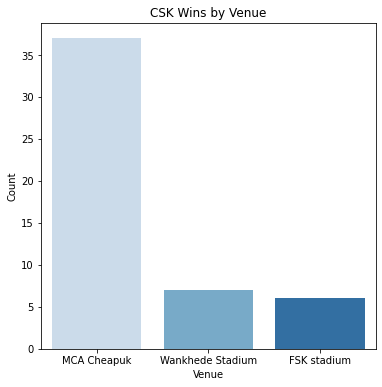

In [47]:
# Here we create a barplot to visualise a team's success at a particular venue.
#In this case we shall be visualizing it using barplots for top 3 venues with maximum wins for a particular team
#CSK
#Create a dataframe subset that will have rows with a particular team as the winner(CSK in this case)
csk_df=iplmatches[iplmatches.winner=='CSK']
#value_counts method helps us get a count of unique values for every combination  in the column, this gets us the number of wins per venue
csk_counts=pd.DataFrame(csk_df['venue'].value_counts()).reset_index()
#Here we are choosing the columns of interest that we will be using to plot in the barplots
csk_counts.columns=['Venue','Count']
#Settting the plot size
plt.figure(figsize = (6,6))
#Creating a barplot by defining x and y axis followed by defining plot axes and titles and then displaying the plot
#We repeat procedure this for all the other teams as well
sns.barplot("Venue", "Count", data=csk_counts.head(3),palette="Blues")
plt.title('CSK Wins by Venue')
plt.show()

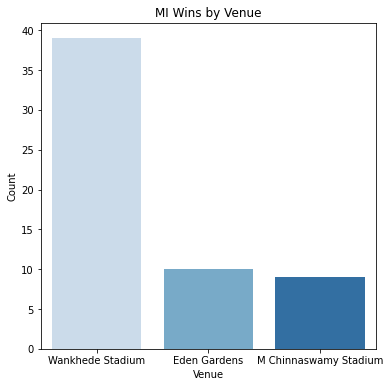

In [48]:
# For MI
mi_df=iplmatches[iplmatches.winner=='MI']
mi_counts=pd.DataFrame(mi_df['venue'].value_counts()).reset_index()
mi_counts.columns=['Venue','Count']
plt.figure(figsize = (6,6))
sns.barplot("Venue", "Count", data=mi_counts.head(3),palette="Blues")
plt.title('MI Wins by Venue')
plt.show()

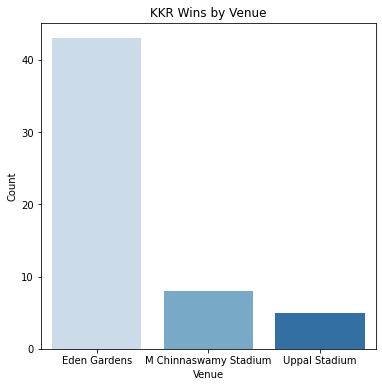

In [49]:
#For KKR
kkr_df=iplmatches[iplmatches.winner=='KKR']
kkr_counts=pd.DataFrame(kkr_df['venue'].value_counts()).reset_index()
kkr_counts.columns=['Venue','Count']
plt.figure(figsize = (6,6))
sns.barplot("Venue", "Count", data=kkr_counts.head(3),palette="Blues")
plt.title('KKR Wins by Venue')
plt.show()

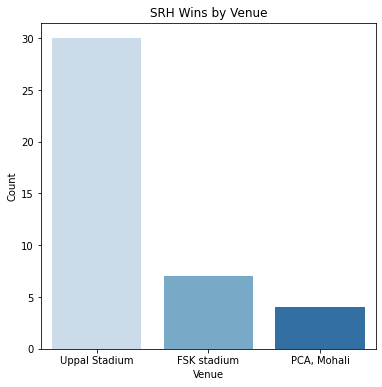

In [50]:
# For SRH
srh_df=iplmatches[iplmatches.winner=='SRH']
srh_counts=pd.DataFrame(srh_df['venue'].value_counts()).reset_index()
srh_counts.columns=['Venue','Count']
plt.figure(figsize = (6,6))
sns.barplot("Venue", "Count", data=srh_counts.head(3),palette="Blues")
plt.title('SRH Wins by Venue')
plt.show()

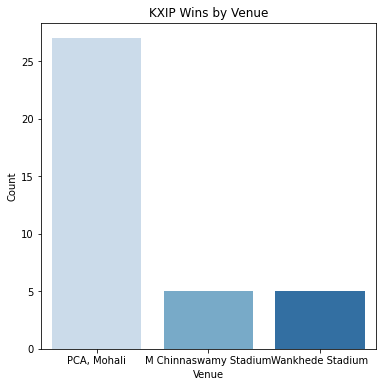

In [51]:
# For KXIP
kxip_df=iplmatches[iplmatches.winner=='KXIP']
kxip_counts=pd.DataFrame(kxip_df['venue'].value_counts()).reset_index()
kxip_counts.columns=['Venue','Count']
plt.figure(figsize = (6,6))
sns.barplot("Venue", "Count", data=kxip_counts.head(3),palette="Blues")
plt.title('KXIP Wins by Venue')
plt.show()

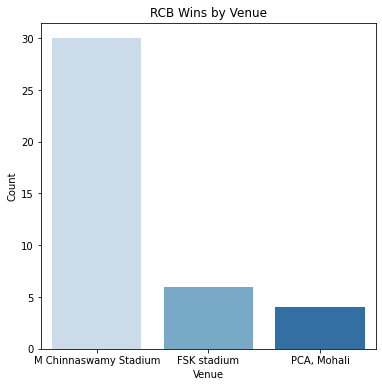

In [52]:
# For RCB
rcb_df=iplmatches[iplmatches.winner=='RCB']
rcb_counts=pd.DataFrame(rcb_df['venue'].value_counts()).reset_index()
rcb_counts.columns=['Venue','Count']
plt.figure(figsize = (6,6))
sns.barplot("Venue", "Count", data=rcb_counts.head(3),palette="Blues")
plt.title('RCB Wins by Venue')
plt.show()

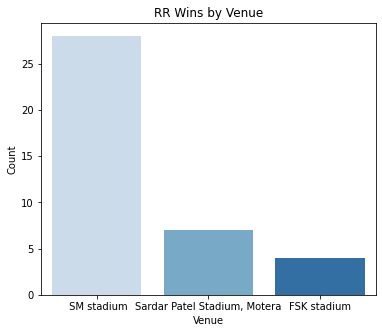

In [53]:
# For RR
rr_df=iplmatches[iplmatches.winner=='RR']
rr_counts=pd.DataFrame(rr_df['venue'].value_counts()).reset_index()
rr_counts.columns=['Venue','Count']
plt.figure(figsize = (6,5))
sns.barplot("Venue", "Count", data=rr_counts.head(3),palette="Blues")
plt.title('RR Wins by Venue')
plt.show()

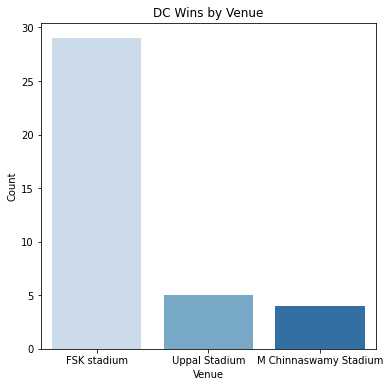

In [54]:
# For DC
dc_df=iplmatches[iplmatches.winner=='DC']
dc_counts=pd.DataFrame(dc_df['venue'].value_counts()).reset_index()
dc_counts.columns=['Venue','Count']
plt.figure(figsize = (6,6))
sns.barplot("Venue", "Count", data=dc_counts.head(3),palette="Blues")
plt.title('DC Wins by Venue')
plt.show()

For all the eight teams we can see that the venue at which they play has an major impact on their performance. Every team has one favorite venue, where they win mojaority of the matches. Given this trend, we feel that 'venue' can act as a good predictor 
for our classification model.

#### 2.) Analyzing if winning the toss increases the chance of each team's chances to win the match ####

In [55]:
# Creating subsets for visualization purposes
csk_df=iplmatches[iplmatches.toss_winner=='CSK']
mi_df=iplmatches[iplmatches.toss_winner=='MI']
kkr_df=iplmatches[iplmatches.toss_winner=='KKR']
srh_df=iplmatches[iplmatches.toss_winner=='SRH']
kxip_df=iplmatches[iplmatches.toss_winner=='KXIP']
rcb_df=iplmatches[iplmatches.toss_winner=='RCB']
rr_df=iplmatches[iplmatches.toss_winner=='RR']
dc_df=iplmatches[iplmatches.toss_winner=='DC']

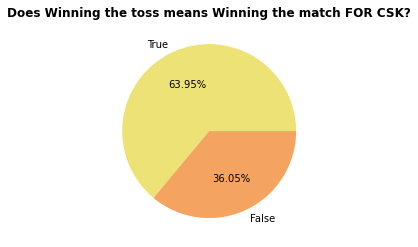

In [56]:
# For CSK
colors = ['#EDE275','#F4A460']
#We get the probabilty of a particular team winning the match after winning the toss(CSK being the team in this case)
probablity_of_win=csk_df["winner"]==csk_df["toss_winner"]
#Through value_counts we get a count of the number of rows where a particular team won both the toss as well as the match
probablity_of_win.value_counts()
#Now we calculate the percentage of of total toss wins upon the total match wins to see visualize how likely a team winning a toss also wins the match
#We reepeat these visualisations for other teams as well.
plt.pie(probablity_of_win.value_counts(),labels=probablity_of_win.value_counts().index,autopct="%1.2f%%",colors=colors)
plt.title("Does Winning the toss means Winning the match FOR CSK?",fontweight="bold")
plt.show()

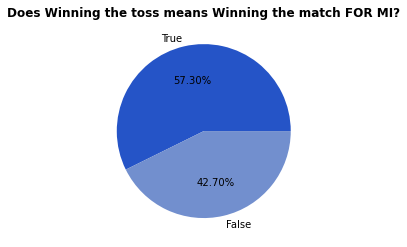

In [57]:
# For MI
colors = ['#2554C7','#728FCE']
probablity_of_win=mi_df["winner"]==mi_df["toss_winner"]
probablity_of_win.value_counts()
plt.pie(probablity_of_win.value_counts(),labels=probablity_of_win.value_counts().index,autopct="%1.2f%%",colors=colors)
plt.title("Does Winning the toss means Winning the match FOR MI?",fontweight="bold")
plt.show()

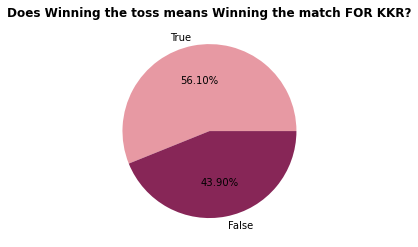

In [58]:
# For KKR
colors = ['#E799A3','#872657']
probablity_of_win=kkr_df["winner"]==kkr_df["toss_winner"]
probablity_of_win.value_counts()
plt.pie(probablity_of_win.value_counts(),labels=probablity_of_win.value_counts().index,autopct="%1.2f%%",colors=colors)
plt.title("Does Winning the toss means Winning the match FOR KKR?",fontweight="bold")
plt.show()

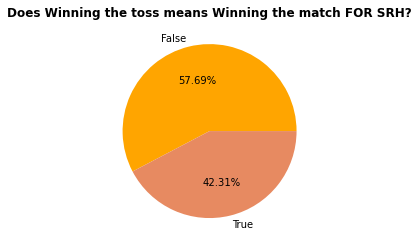

In [59]:
# For SRH
colors = ['#FFA500','#E78A61']
probablity_of_win=srh_df["winner"]==srh_df["toss_winner"]
probablity_of_win.value_counts()
plt.pie(probablity_of_win.value_counts(),labels=probablity_of_win.value_counts().index,autopct="%1.2f%%",colors=colors)
plt.title("Does Winning the toss means Winning the match FOR SRH?",fontweight="bold")
plt.show()

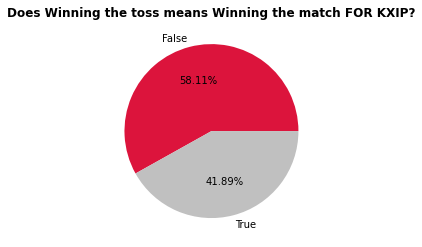

In [60]:
# For KXIP
colors = ['#DC143C','#C0C0C0']
probablity_of_win=kxip_df["winner"]==kxip_df["toss_winner"]
probablity_of_win.value_counts()
plt.pie(probablity_of_win.value_counts(),labels=probablity_of_win.value_counts().index,autopct="%1.2f%%",colors=colors)
plt.title("Does Winning the toss means Winning the match FOR KXIP?",fontweight="bold")
plt.show()

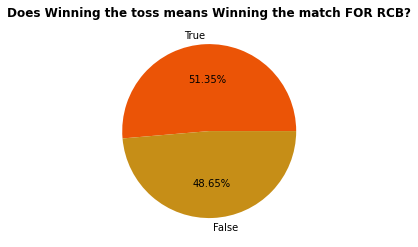

In [61]:
# For RCB
colors = ['#EB5406','#C68E17']
probablity_of_win=rcb_df["winner"]==rcb_df["toss_winner"]
probablity_of_win.value_counts()
plt.pie(probablity_of_win.value_counts(),labels=probablity_of_win.value_counts().index,autopct="%1.2f%%",colors=colors)
plt.title("Does Winning the toss means Winning the match FOR RCB?",fontweight="bold")
plt.show()

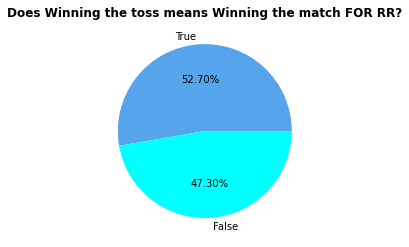

In [62]:
# For RR
colors = ['#56A5EC','#00FFFF']
probablity_of_win=rr_df["winner"]==rr_df["toss_winner"]
probablity_of_win.value_counts()
plt.pie(probablity_of_win.value_counts(),labels=probablity_of_win.value_counts().index,autopct="%1.2f%%",colors=colors)
plt.title("Does Winning the toss means Winning the match FOR RR?",fontweight="bold")
plt.show()

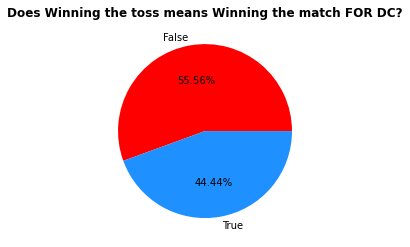

In [63]:
# For DC
colors = ['#FF0000','#1E90FF']
probablity_of_win=dc_df["winner"]==dc_df["toss_winner"]
probablity_of_win.value_counts()
plt.pie(probablity_of_win.value_counts(),labels=probablity_of_win.value_counts().index,autopct="%1.2f%%",colors=colors)
plt.title("Does Winning the toss means Winning the match FOR DC?",fontweight="bold")
plt.show()

For all the teams except DC, if a team wins the toss, their chances of winning the match is higher when compared to not winning the toss. Given this trend, we feel that the 'toss_winner' can act as a good predictor for our classification model.

#### 3.) Analyzing each team's preference to bat or field after winning the toss ####

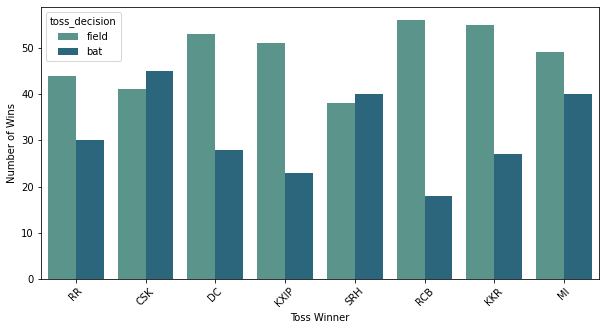

In [64]:
plt.subplots(figsize=(10,5))
sns.color_palette()
sns.countplot(iplmatches["toss_winner"], hue=iplmatches["toss_decision"], palette = "crest")
plt.xticks(rotation=45)
plt.xlabel("Toss Winner")
plt.ylabel("Number of Wins")
plt.show()

For all the teams, we clearly see different trends. Few teams prefer fielding first whereas few teams prefer batting first. Hence, we feel that the 'toss_decision' can act as a good predictor for our classification model.

### Modeling Process ###

In [65]:
# dropping columns for which we won't have information at the start of the match so hence couldn't be used as a predictor
iplmatches = iplmatches.drop(['result', 'dl_applied', 'win_by_runs', 'win_by_wickets'], axis=1)

#### The predictors that we use: ####
<br>
 - season
<br>
 - city
<br>
 - team1
<br>
 - team2
<br>
 - toss_winner
<br>
 - toss_decision
<br>
 - venue

#### The output that we predict is: ####
<br> 
winner - This has the following categories: MI(1), CSK(2), KKR(3), SRH(4), KXIP(5), RCB(6), RR(7), DC(8)

In [66]:
# checking the data types of all the columns
iplmatches.dtypes

season            int64
city             object
team1            object
team2            object
toss_winner      object
toss_decision    object
winner           object
venue            object
dtype: object

In [67]:
# encoding all the 8 teams in the 'winner' column to numbers 1-8
encode = {'winner': {'MI':1,'CSK':2,'KKR':3,'SRH':4,'KXIP':5,'RCB':6,'RR':7,'DC':8}}
iplmatches.replace(encode, inplace=True)
iplmatches.head()

,season,city,team1,team2,toss_winner,toss_decision,winner,venue
116,2008,Mumbai,CSK,RR,RR,field,7,Dr DY Patil Sports Academy
82,2008,Jaipur,CSK,RR,CSK,bat,7,SM stadium
81,2008,Mumbai,MI,DC,DC,field,1,Dr DY Patil Sports Academy
80,2008,Chandigarh,KXIP,KKR,KXIP,bat,5,"PCA, Mohali"
79,2008,Hyderabad,SRH,RCB,SRH,bat,6,Uppal Stadium


In [68]:
# label encoding the 'toss_decision' column
cat_var = ['toss_decision']
le = LabelEncoder()
for i in cat_var:
    iplmatches[i] = le.fit_transform(iplmatches[i])
iplmatches.head()

,season,city,team1,team2,toss_winner,toss_decision,winner,venue
116,2008,Mumbai,CSK,RR,RR,1,7,Dr DY Patil Sports Academy
82,2008,Jaipur,CSK,RR,CSK,0,7,SM stadium
81,2008,Mumbai,MI,DC,DC,1,1,Dr DY Patil Sports Academy
80,2008,Chandigarh,KXIP,KKR,KXIP,0,5,"PCA, Mohali"
79,2008,Hyderabad,SRH,RCB,SRH,0,6,Uppal Stadium


In [69]:
# one hot label encoding for all the left out categorical columns in the data (this is better than label encoding because
# it doesn't assign numeric values to each categorical levels so when there are many levels, the level with high level
# number is not given more importance by the machine learning algorithm)
iplmatches = pd.get_dummies(iplmatches, columns = ['city', 'team1', 'team2', 'toss_winner', 'venue'])
iplmatches.head()

,season,toss_decision,winner,city_Abu Dhabi,city_Ahmedabad,city_Bangalore,city_Bloemfontein,city_Cape Town,city_Centurion,city_Chandigarh,...,"venue_Sardar Patel Stadium, Motera",venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,venue_Uppal Stadium,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
116,2008,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,2008,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,2008,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,2008,0,5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
79,2008,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
# years from 2008 to 2018 is used for training and year 2019 is used for testing
train_data = iplmatches.loc[iplmatches['season'] != 2019]
test_data = iplmatches.loc[iplmatches['season'] == 2019]

In [71]:
# verifying the above split
train_data["season"].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int64)

In [72]:
# separating the X and y variables in the training set
X_train = train_data.loc[:, train_data.columns != 'winner']
y_train = train_data.loc[:, train_data.columns == 'winner']

In [73]:
# verifying the above split
test_data["season"].unique()

array([2019], dtype=int64)

In [74]:
# separating the X and y variables in the testing set
X_test = test_data.loc[:, test_data.columns != 'winner']
y_test = test_data.loc[:, test_data.columns == 'winner']
X_test.head()

,season,toss_decision,city_Abu Dhabi,city_Ahmedabad,city_Bangalore,city_Bloemfontein,city_Cape Town,city_Centurion,city_Chandigarh,city_Chennai,...,"venue_Sardar Patel Stadium, Motera",venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,venue_Uppal Stadium,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
736,2019,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
739,2019,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
738,2019,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
737,2019,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
735,2019,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Logistic Regression Classifier ####

A simple model in which a sigmoid function is used to find a continuous value of P(Y=1) for a given input X, which is later converted to Y=0 or Y=1 based on a threshold value.

In [75]:
# initializing the logistic regression classifier model
logclassifier = LogisticRegression()

# fitting the model
logclassifier.fit(X_train, y_train)

# predicting the test set results
y_pred = logclassifier.predict(X_test)

# accuracy of the model
accuracy = accuracy_score(y_test, y_pred)*100
print('The Accuracy of the Logistic classifier model is equal to ' + str(round(accuracy, 2)) + '%')

The Accuracy of the Logistic classifier model is equal to 57.63%


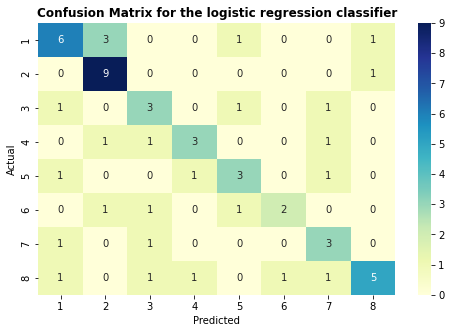

In [76]:
# plotting the confusion matrix for the logistic regression model
cm = confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['1','2','3','4','5','6','7','8'],index=['1','2','3','4','5','6','7','8'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix for the logistic regression classifier', fontsize = 12, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We see that there are very few/no false negatives and false positives for each class of the output variable.

Assumptions/Drawbacks: It learns a linear relationship from the given dataset and then introduces a non-linearity in the form of the sigmoid function. Hence when there is non-linear relationship between the inputs and the output variable, this model doesn't perform well. Another assumption made here is that all the predictors are not correlated.

#### K-Nearest Neighbors Classifier ####

A model in which nothing is assumed about the data and just the nearby neighbors are looked at to decide the class of the test data point

In [77]:
# creating a list of K for the KNN algorithm
# the model will consider K values from 1 till 30 with an interval of 2 (All odd numbers from 1 till 30)
k_list = list(range(1,30,2))

# creating list of average accuracy for each cross-validation
cv_scores = []

# performing 5-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

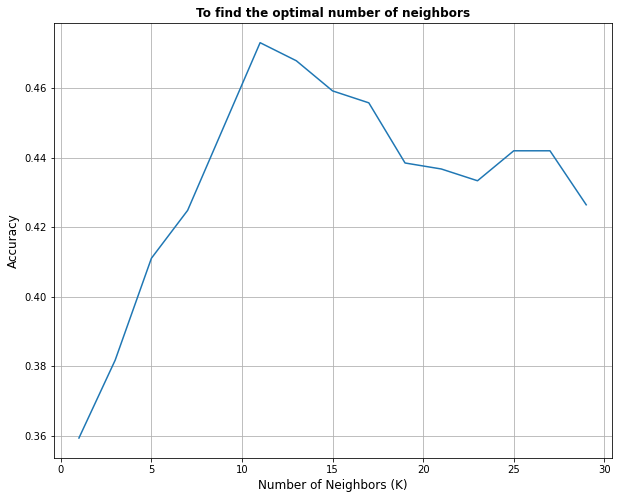

In [78]:
# plotting average accuracy for all number of neighbors
plt.figure()
plt.figure(figsize=(10,8))
plt.title('To find the optimal number of neighbors', fontsize = 12, fontweight='bold')
plt.xlabel('Number of Neighbors (K)', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.plot(k_list, cv_scores)
plt.grid()
plt.show()

In [79]:
# building a KNN model with K = 11 since from the above chart we can infer that at K = 11, the highest accuracy is achieved
knnclassifier = KNeighborsClassifier(n_neighbors = 11)

# fitting the model
knnclassifier.fit(X_train, y_train)

# predicting the test set results
y_pred = knnclassifier.predict(X_test)

# accuracy of the model
accuracy = accuracy_score(y_test, y_pred)*100
print('The Accuracy of the KNN classifier model is equal to ' + str(round(accuracy, 2)) + '%')

The Accuracy of the KNN classifier model is equal to 66.1%


Assumptions/Drawbacks: Since we have a lot of categorical columns, after we do one-hot encoding, the number of columns drastically increase and usually KNN algorithm is not ideal for large datasets due to the computational requirements.

#### Random Forest Classifier ####

Decision trees are tree-like model of decisions and Random forest model is set of multiple decision trees to prevent overfitting. Decision tree models are ideal in our case since we have a lot of categorical data.

A very simple decision tree is visualized to understand the process of the random forest classifier

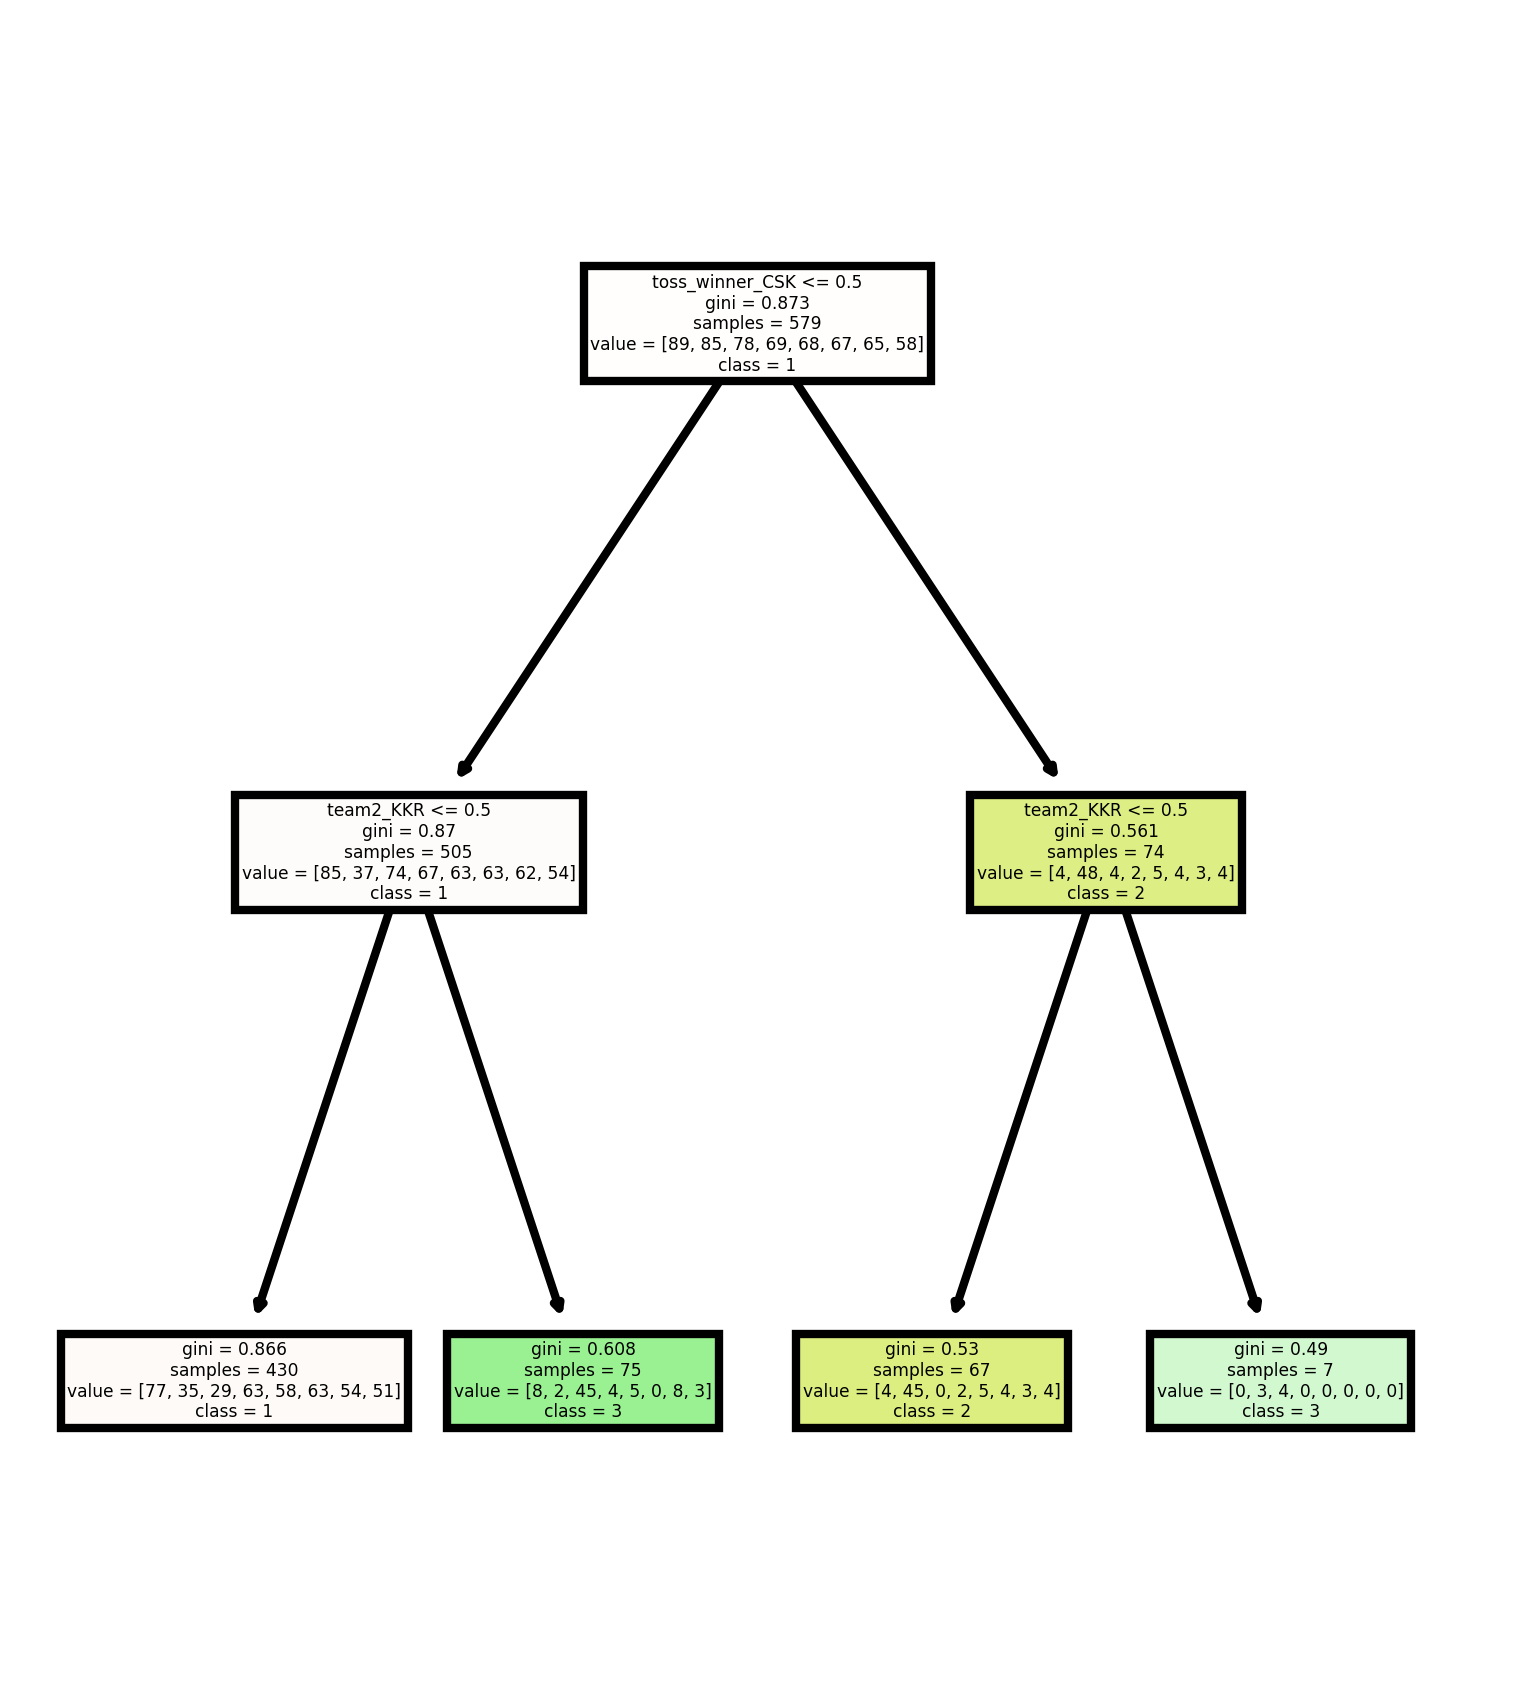

In [80]:
# a decision tree is fitted with max_depth = 2
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
clf.fit(X_train, y_train)

# the obtained tree is plotted and saved as an image
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3.5), dpi=600)
tree.plot_tree(clf,
               feature_names = X_train.columns, 
               class_names = ['1','2','3','4','5','6','7','8'],
               filled = True);
fig.savefig('image.png')

In [81]:
# random forest classifier is trained using the technique of hyperparameter tuning
# dictionary with different set of parameters for the random forest 
params = {
    "criterion":("gini", "entropy", "loss"),
    "n_estimators":(list(range(100,300,20))),
    "max_depth":(list(range(1,20,4))),
    "min_samples_split":(list(range(5,30,4)))
}

# initializing the random forest classifier model
rfclassifier = RandomForestClassifier()
# using cross validation (cv = 5) and searching for the best paramters
rfclassifier = GridSearchCV(rfclassifier, params, scoring = "accuracy", n_jobs = -1, verbose = 1, cv = 5)
# fitting the model
rfclassifier.fit(X_train, y_train)
# getting the best parameters and printing it
best_params = rfclassifier.best_params_
print(f"Best paramters: {best_params})")

# fitting the model with the best parameters found above
rfclassifier = RandomForestClassifier(**best_params, random_state = 1)
rfclassifier.fit(X_train, y_train)

# predicting the test set results
y_pred = rfclassifier.predict(X_test)

# accuracy of the model
accuracy = accuracy_score(y_test, y_pred)*100
print('The Accuracy of the Random Forest classifier model is equal to ' + str(round(accuracy, 2)) + '%')

Fitting 5 folds for each of 1050 candidates, totalling 5250 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 29, 'n_estimators': 140})
The Accuracy of the Random Forest classifier model is equal to 61.02%


Assumptions/Drawbakcs: Random forests uses the concept of bagging and feature randomness to build uncorrelated forest of trees. The assumption made here is that in the process of bagging, the sample is representative of the whole trainig dataset. Another requirement here is that the all the features have some predictive power. When these assumptions fail, the model would not perform that well. 

#### Naive Bayes Classifier ####

Since most of our predictors are independent of each other, we try Naive Bayes classifier in which the model uses the Bayes Theorem to calculate the conditional probability of an event.

In [82]:
# Splitting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

In [83]:
# finding the ideal variance smoothing value for the Naive Bayes Theorem
train_score = []
val_score = []
alpha = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 1]

for i in alpha:
    gaussian = GaussianNB(var_smoothing = i)
    nb_model = gaussian.fit(X_train, y_train)
    train_score.append(nb_model.score(X_train, y_train))
    val_score.append(nb_model.score(X_val, y_val))

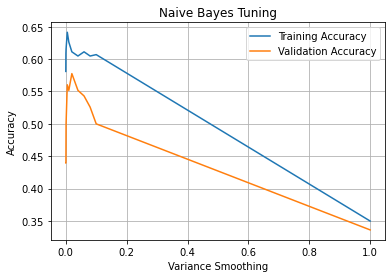

In [84]:
plt.plot(alpha, train_score)
plt.plot(alpha, val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Naive Bayes Tuning')
plt.xlabel('Variance Smoothing')
plt.ylabel('Accuracy')
plt.grid()

In [85]:
# based on the above graph, we find the ideal variance smoothing value to be 0.06 
# initializing and fitting the model
gaussian = GaussianNB(var_smoothing = 0.06)
nb_model = gaussian.fit(X_train, y_train)

# accuracy of the model
print('The Accuracy of the Naive Bayes classifier model is equal to ' + str(round(nb_model.score(X_test, y_test)*100, 2)) + '%')

The Accuracy of the Naive Bayes classifier model is equal to 71.19%


Assumptions/Drawbacks: Naives Bayes makes an important assumption that all the predictors are independent. In our case, even though most of them are, some are not. For example, the probability of a team to win at a particular venue may change based on its opponent. Hence this factor could degrade the performance of the classifier. Another assumption made here is that all the predictors have an equal effect on the outcome.